In [1]:
#pip install citipy


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
# URL for GET requests to retrieve city data
url = "http://api.openweathermap.org/data/2.5/weather?"

#query URL
query_url = f"{url}appid={weather_api_key}&units=imperial&q="

# Lists 
lon = []
temp = []
temp_max = []
humidity = []
wind_speed = []
lat = []
date = []
country = []
cloudiness = []

# Loop through and request
print("Data Retrieval Searching")
print("--------------------------")
count = 0
set = 1
for index, city in enumerate(cities):
    count = count + 1
   
    if count == 51:
        count = 1
        set = set + 1
        time.sleep(10)
    print(f"Processing Record {count} of Set {set} | {city}")
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        print("City not found. searching again...")
        lat.append(np.nan)
        lon.append(np.nan)
        temp.append(np.nan)
        temp_max.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        date.append(np.nan)
        country.append(np.nan)
        cloudiness.append(np.nan)
print("----------------------------")
print("Data Retrieval Complete")
print("--------------------------")



Data Retrieval Searching
--------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | wattegama
Processing Record 3 of Set 1 | half moon bay
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | raichur
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | mayo
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | mezen
Processing Record 14 of Set 1 | airai
Processing Record 15 of Set 1 | panguna
Processing Record 16 of Set 1 | lewiston
Processing Record 17 of Set 1 | los llanos de aridane
Processing Record 18 of Set 1 | yar-sale
Processing Record 19 of Set 1 | magistralnyy
Processing Record 20 of Set 1 | esperance
Processing Record 21 of Set 1 | bluff
Processing Record 22 of Set 1 | margate
Processing Record 23 of Set 1 | vryburg
Processi

Processing Record 37 of Set 4 | upernavik
Processing Record 38 of Set 4 | kaeo
Processing Record 39 of Set 4 | moshi
Processing Record 40 of Set 4 | vila velha
Processing Record 41 of Set 4 | terney
Processing Record 42 of Set 4 | sovetskiy
Processing Record 43 of Set 4 | abu samrah
Processing Record 44 of Set 4 | bonthe
Processing Record 45 of Set 4 | ambon
Processing Record 46 of Set 4 | kawalu
Processing Record 47 of Set 4 | cape town
Processing Record 48 of Set 4 | coalinga
Processing Record 49 of Set 4 | syracuse
Processing Record 50 of Set 4 | arraial do cabo
Processing Record 1 of Set 5 | smithers
Processing Record 2 of Set 5 | geraldton
Processing Record 3 of Set 5 | mutis
Processing Record 4 of Set 5 | hami
Processing Record 5 of Set 5 | tuatapere
Processing Record 6 of Set 5 | novi pazar
Processing Record 7 of Set 5 | constitucion
Processing Record 8 of Set 5 | vestmannaeyjar
Processing Record 9 of Set 5 | faanui
Processing Record 10 of Set 5 | saldanha
Processing Record 11 o

Processing Record 17 of Set 8 | amuntai
Processing Record 18 of Set 8 | fairbanks
Processing Record 19 of Set 8 | lagoa
Processing Record 20 of Set 8 | yeppoon
Processing Record 21 of Set 8 | oussouye
Processing Record 22 of Set 8 | ilfracombe
Processing Record 23 of Set 8 | coihaique
Processing Record 24 of Set 8 | wynyard
Processing Record 25 of Set 8 | boddam
Processing Record 26 of Set 8 | formosa
Processing Record 27 of Set 8 | plettenberg bay
Processing Record 28 of Set 8 | severo-kurilsk
Processing Record 29 of Set 8 | sawakin
Processing Record 30 of Set 8 | sohbatpur
Processing Record 31 of Set 8 | lapua
Processing Record 32 of Set 8 | pangai
Processing Record 33 of Set 8 | himora
City not found. searching again...
Processing Record 34 of Set 8 | isangel
Processing Record 35 of Set 8 | ust-ordynskiy
Processing Record 36 of Set 8 | ulladulla
Processing Record 37 of Set 8 | whitehorse
Processing Record 38 of Set 8 | batemans bay
Processing Record 39 of Set 8 | ruatoria
City not f

Processing Record 8 of Set 12 | lusambo
Processing Record 9 of Set 12 | terrace bay
Processing Record 10 of Set 12 | bentiu
Processing Record 11 of Set 12 | sabzevar
Processing Record 12 of Set 12 | am timan
Processing Record 13 of Set 12 | belmonte
Processing Record 14 of Set 12 | seda
Processing Record 15 of Set 12 | okhotsk
Processing Record 16 of Set 12 | luancheng
Processing Record 17 of Set 12 | antananarivo
Processing Record 18 of Set 12 | luderitz
Processing Record 19 of Set 12 | moron
Processing Record 20 of Set 12 | verkhnevilyuysk
Processing Record 21 of Set 12 | guaraniacu
Processing Record 22 of Set 12 | macaboboni
City not found. searching again...
Processing Record 23 of Set 12 | eldikan
City not found. searching again...
Processing Record 24 of Set 12 | grajau
Processing Record 25 of Set 12 | zhigansk
Processing Record 26 of Set 12 | pryozerne
Processing Record 27 of Set 12 | hindoria
Processing Record 28 of Set 12 | yulara
Processing Record 29 of Set 12 | zyryanka
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_df = pd.DataFrame({
    "City": cities,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
})

# Drop any cities that were skipped due to no response
city_df = city_df.dropna(how="any")

# Export.csv file.
city_df.to_csv("./output_data/cities.csv")
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,58.75,68.0,64.0,3.36,ZA,1.650866e+09
1,wattegama,6.7989,81.4808,92.16,51.0,60.0,1.88,LK,1.650866e+09
2,half moon bay,37.4636,-122.4286,56.48,77.0,0.0,16.11,US,1.650866e+09
3,yellowknife,62.4560,-114.3525,30.72,69.0,20.0,13.80,CA,1.650866e+09
4,avarua,-21.2078,-159.7750,77.05,88.0,98.0,1.14,CK,1.650866e+09
...,...,...,...,...,...,...,...,...,...
597,guatire,10.4762,-66.5427,76.69,96.0,80.0,1.34,VE,1.650866e+09
598,malakal,9.5334,31.6605,84.83,55.0,73.0,6.33,SS,1.650866e+09
599,saiha,22.4833,92.9667,96.15,24.0,0.0,5.26,IN,1.650866e+09
600,atar,20.5169,-13.0499,71.28,38.0,0.0,7.43,MR,1.650866e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
city_df["Humidity"].describe()

count    551.000000
mean      70.923775
std       20.856165
min        1.000000
25%       61.000000
50%       75.000000
75%       87.000000
max      100.000000
Name: Humidity, dtype: float64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

C:\Users\lotus\AppData\Local\Temp/ipykernel_38808/1140649314.py:8: UserWarning: You passed a edgecolor/edgecolors ('green') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_values, y_values, edgecolor="green", linewidth=1, marker="x", alpha=0.8)


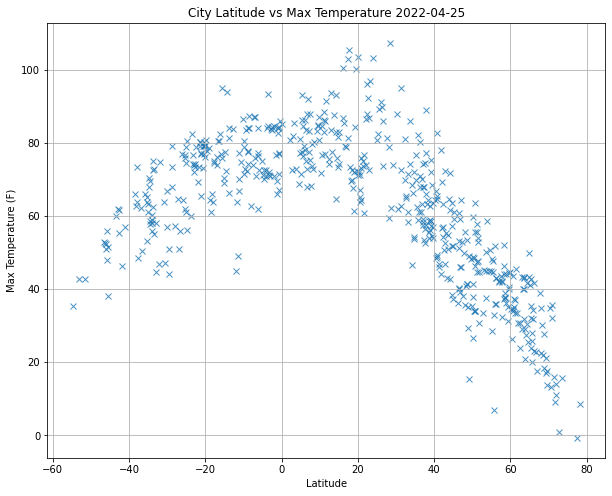

In [7]:
current_date = datetime.date(datetime.now())

# Create a scatter plot for latitude vs max temperature.
x_values = city_df["Lat"]
y_values = city_df["Max Temp"]

fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values, edgecolor="green", linewidth=1, marker="x", alpha=0.8)
plt.title(f"City Latitude vs Max Temperature {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save fig
plt.savefig("./output_data/latitude_vs_max_temp.png")
plt.show()

## Latitude vs. Humidity Plot

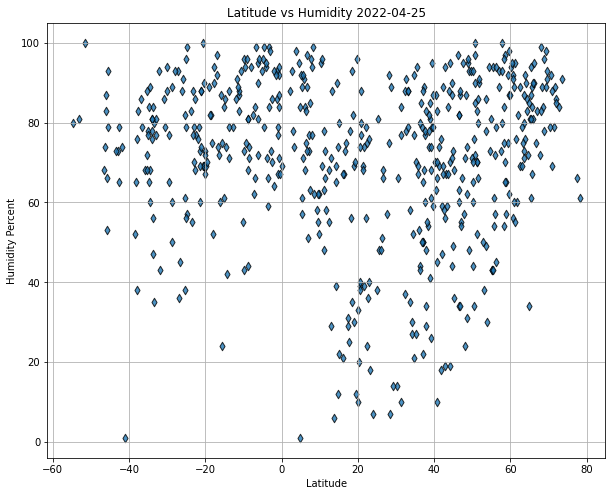

In [8]:
x_values = city_df["Lat"]
y_values = city_df["Humidity"]

fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="d", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Humidity Percent")
plt.title(f"Latitude vs Humidity {current_date}")
plt.grid()

# Save
plt.savefig("./output_data/lat_vs_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

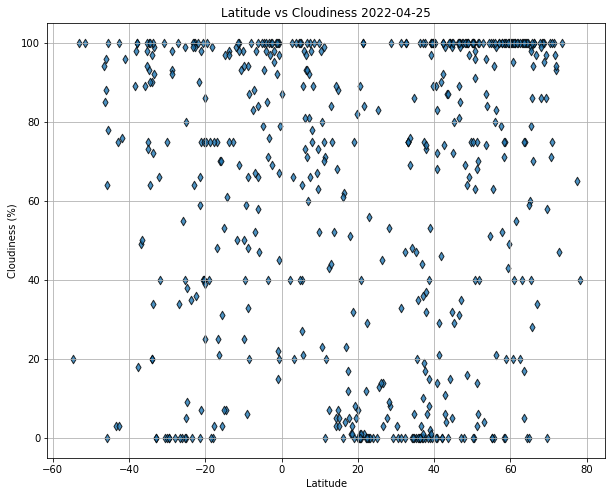

In [9]:
# Create a scatter plot for latitude vs cloudiness.
x_values = city_df["Lat"]
y_values = city_df["Cloudiness"]

fig1, ax1 = plt.subplots(figsize=(10,8))

plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="d", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Latitude vs Cloudiness {current_date}")
plt.grid()

# Save
plt.savefig("./output_data/lat_vs_cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

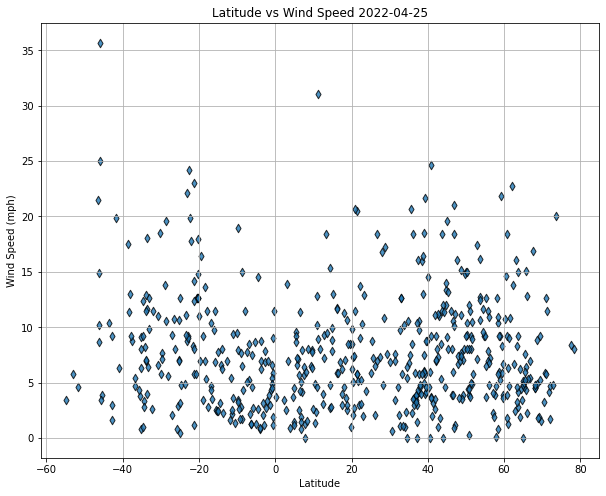

In [10]:
x_values = city_df["Lat"]
y_values = city_df["Wind Speed"]

fig1, ax1 = plt.subplots(figsize=(10,8))

plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="d", alpha=0.8)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Latitude vs Wind Speed {current_date}")
plt.grid()

# Save
plt.savefig("./output_data/lat_vs_windspeed.png")
plt.show()

## Linear Regression

In [13]:
# Create a function to create Linear Regression plots for remaining activities
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # regression values
    regress_values = x_values * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # plot    
    fig1, ax1 = plt.subplots(figsize=(12,8))
    plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="d", alpha=0.8)
    plt.plot(x_values,regress_values,"r-")
    current_date = datetime.date(datetime.now())
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} {current_date}",fontsize = 15)
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel(y_label,fontsize=14)
    if ylim is not None:
        plt.ylim(0, ylim)
    plt.annotate(line_eq, text_coordinates, fontsize=20, color="red")
    
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    corr = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(corr[0],2)}")

        
#Northern and Southern DFs
northern_df = city_df.loc[city_df["Lat"] >= 0]
southern_df = city_df.loc[city_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7552371545715975


NameError: name 'st' is not defined

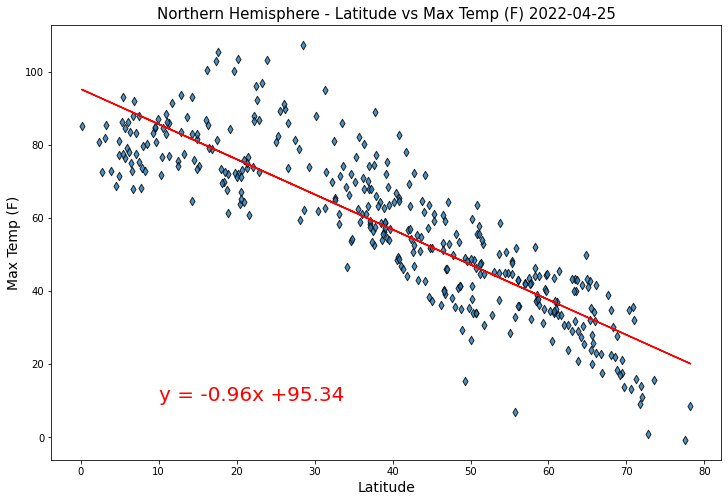

In [14]:
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Northern", (10, 10))

# Savefig
plt.savefig("./output_data/north_maxtemp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.455659141987201


NameError: name 'st' is not defined

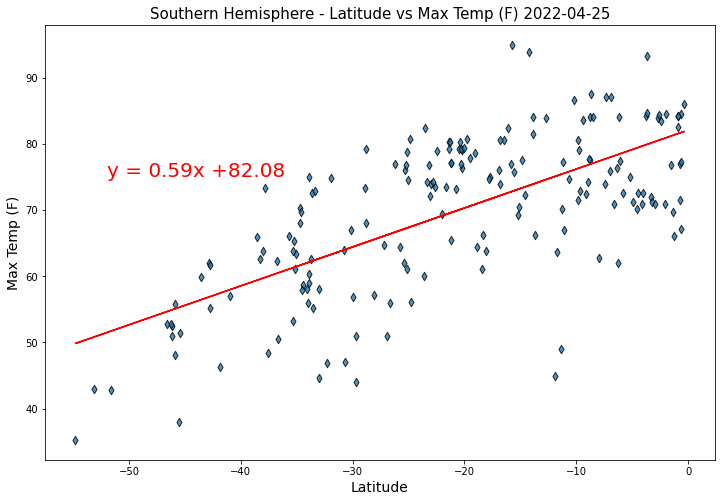

In [15]:
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Southern", (-52, 75))

# Save the figure
plt.savefig("./output_data/southern_max_temp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.05370922929406602


NameError: name 'st' is not defined

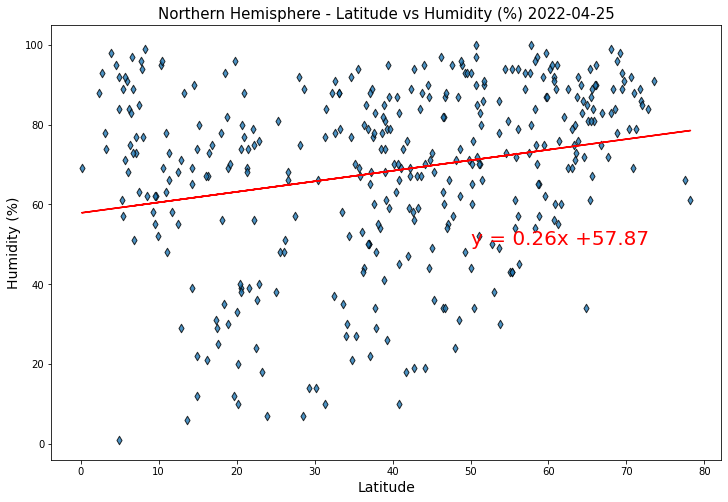

In [16]:
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(50,50))
plt.savefig("./output_data/northern_humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [17]:
x_values = southern_df['Lat']
y_values = southern_df['Humidity']
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Southern",(50, 50), 100)
plt.savefig("./output_data/southern_humudity.png)
plt.show()

SyntaxError: EOL while scanning string literal (Temp/ipykernel_38808/527255170.py, line 4)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.056745679992686225


NameError: name 'st' is not defined

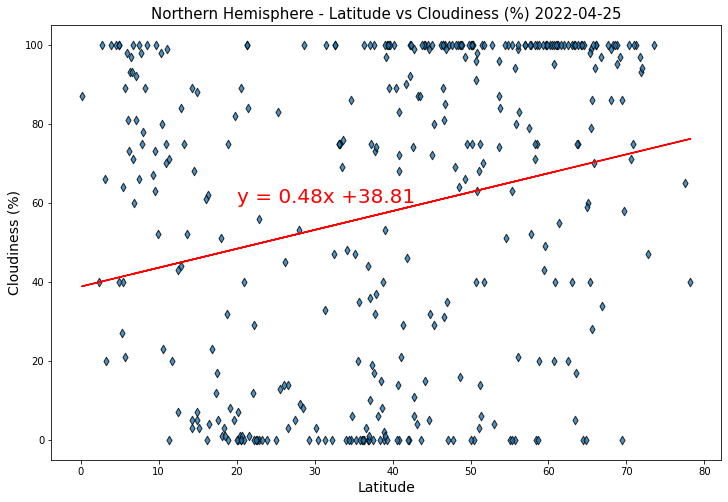

In [18]:
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", "Northern", (20, 60))

plt.savefig("./output_data/northern_cloudiness.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0059808446510132875


NameError: name 'st' is not defined

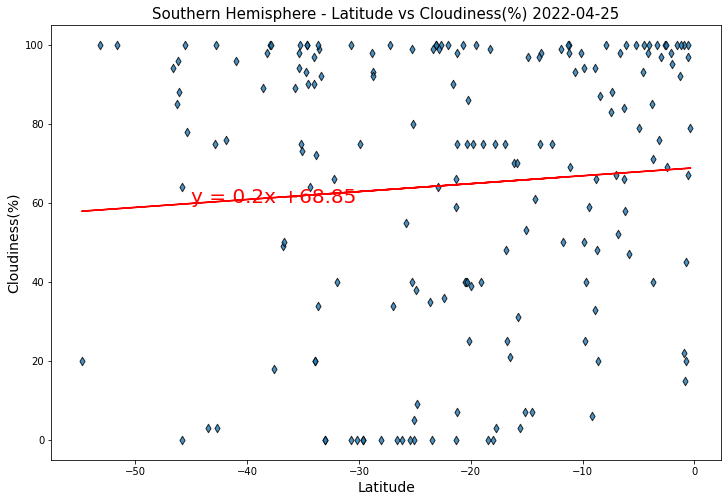

In [19]:
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))
plt.savefig("./output_data/southern_cloudiness.png", bbox_inches="tight")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.004849068585429885


NameError: name 'st' is not defined

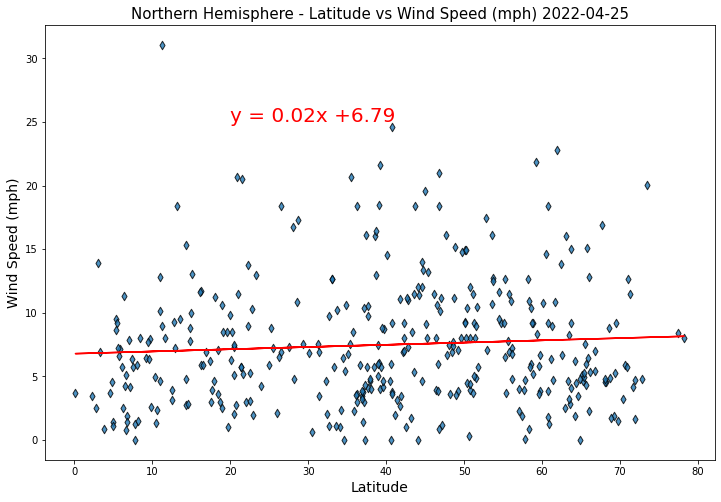

In [20]:
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern",(20, 25))
plt.savefig("./output_data/northern_wind_speed.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.09512518860369557


NameError: name 'st' is not defined

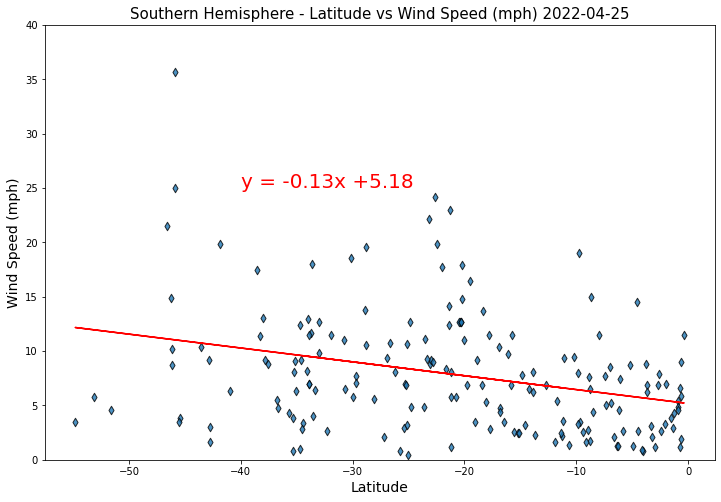

In [21]:
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern",(-40, 25), ylim=40)
plt.savefig("./output_data/southern_wind_speed.png", bbox_inches="tight")
plt.show()